In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

%matplotlib inline

In [2]:
df_pdf = pd.read_csv('final.csv')

# Display first 5 Rows.
df_pdf.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,URI,Colors,Malicious
0,187,187,54,54,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,No
1,70,70,17,17,2,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,No
2,9,9,3,3,1,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
3,11,11,3,3,2,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No
4,14,15,1,1,1,1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Yes


In [3]:
df_pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30989 entries, 0 to 30988
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MD5               30989 non-null  int64  
 1   pdfsize           30989 non-null  int64  
 2   metadata size     30989 non-null  int64  
 3   pages             30989 non-null  int64  
 4   xref length       30989 non-null  int64  
 5   title characters  30989 non-null  int64  
 6   isEncrypted       30989 non-null  int64  
 7   embedded files    30989 non-null  int64  
 8   images            30989 non-null  int64  
 9   contains text     30989 non-null  int64  
 10  	header           30989 non-null  int64  
 11  obj               30989 non-null  int64  
 12  endobj            30989 non-null  int64  
 13  stream            30989 non-null  int64  
 14  endstream         30989 non-null  int64  
 15  xref              30989 non-null  int64  
 16  trailer           30989 non-null  int64 

In [4]:
sum(df_pdf.isnull().sum())

1610

In [5]:
df_pdf[df_pdf.isnull().any(axis=1)].head(3)

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,URI,Colors,Malicious
15,0,0,0,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
412,1,0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
420,1,0,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [6]:
# store numerical columns to vaiable
numeric_columns = [x for x in df_pdf.columns if df_pdf[x].dtype != 'object'] # output 12 numerical variables

# identify Imputer
mice_imputer = IterativeImputer()

# Apply imputation 
df_pdf[numeric_columns] = mice_imputer.fit_transform(df_pdf[numeric_columns])

In [7]:
sum(df_pdf.isnull().sum())

0

In [8]:
data = df_pdf
df_pdf.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,URI,Colors,Malicious
0,187.0,187.0,54.0,54.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,No
1,70.0,70.0,17.0,17.0,2.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,No
2,9.0,9.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
3,11.0,11.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No
4,14.0,15.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Yes


In [9]:
data.iloc[:, 33] = data.iloc[:, 33].map({'Yes': 1, 'No': 0})

In [10]:
data = data.apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30989 entries, 0 to 30988
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MD5               30989 non-null  float64
 1   pdfsize           30989 non-null  float64
 2   metadata size     30989 non-null  float64
 3   pages             30989 non-null  float64
 4   xref length       30989 non-null  float64
 5   title characters  30989 non-null  float64
 6   isEncrypted       30989 non-null  float64
 7   embedded files    30989 non-null  float64
 8   images            30989 non-null  float64
 9   contains text     30989 non-null  float64
 10  	header           30989 non-null  float64
 11  obj               30989 non-null  float64
 12  endobj            30989 non-null  float64
 13  stream            30989 non-null  float64
 14  endstream         30989 non-null  float64
 15  xref              30989 non-null  float64
 16  trailer           30989 non-null  float6

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your dataset is in a pandas DataFrame called 'df'
# The last column is used as the target for splitting
target_column = data.columns[-1]

# Split data where the value of the last column is 1 and 0 (or other values)
df_ones = data[data[target_column] == 1]
df_others = data[data[target_column] != 1]

# Select 10,000 samples from where the last column is 1 for testing
df_test, _ = train_test_split(df_ones, test_size=(len(df_ones) - 10000), random_state=42)

# Use the remaining 20,000 samples for training (including all 'others' and remaining 'ones')
df_train = pd.concat([df_others, df_ones.drop(df_test.index)])

# Check the shape of the splits
print(f'Training set size: {df_train.shape}')
print(f'Test set size: {df_test.shape}')

# If needed, split training data into features and labels
X_train = df_train.iloc[:, :-1]  # All columns except the last one (features)
y_train = df_train.iloc[:, -1]   # The last column (target)

X_test = df_test.iloc[:, :-1]    # Test features
y_test = df_test.iloc[:, -1]     # Test target


Training set size: (20989, 34)
Test set size: (10000, 34)


In [14]:
df_train.Malicious.value_counts()

Malicious
1    11882
0     9107
Name: count, dtype: int64

In [15]:
df_test.Malicious.value_counts()

Malicious
1    10000
Name: count, dtype: int64

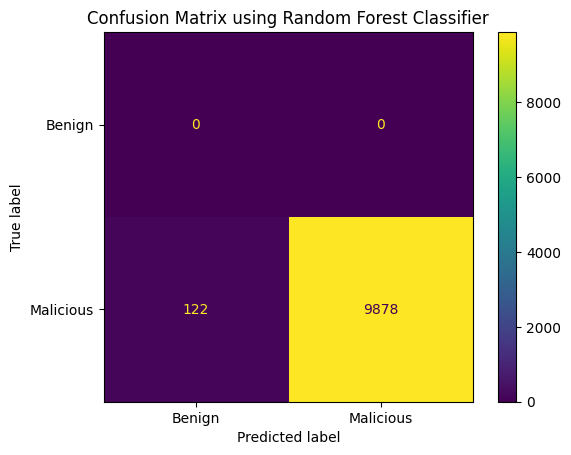

False Positive Rate: nan
True Positive Rate: 0.9878
Accuracy Score: 0.9878


C:\Users\lky24\AppData\Local\Temp\ipykernel_4984\935531782.py:21: RuntimeWarning: invalid value encountered in scalar divide
  print(f'False Positive Rate: {fp / (fp + tn)}')


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=2, max_depth=50, random_state=42, max_features='log2')

# Train the model
rf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')